<a href="https://colab.research.google.com/github/Felixwkk/stocks/blob/master/4_property_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [0]:
# The tech stocks we'll use for this analysis
tech_list = ['C31.SI', 'C09.SI', 'TQ5.SI', 'W05.SI']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


# solving the '.' stock naming variable by removing the '.'
tech_list_amend = []
for x in tech_list:
  tech_list_amend.append(x.replace('.',''))

#For loop for grabing yahoo finance data and setting as a dataframe
for stock, stock_amend in zip(tech_list, tech_list_amend):   
    # Set DataFrame as the Stock Ticker
    globals()[stock_amend] = DataReader(stock, 'yahoo', start, end)

In [3]:
tech_list_amend

['C31SI', 'C09SI', 'TQ5SI', 'W05SI']

In [0]:
# for company, company_name in zip(company_list, tech_list):
#     company["company_name"] = company_name

In [4]:
company_list = [C31SI, C09SI, TQ5SI, W05SI]
company_name = ["CAPITLAND", "CDL", "FRASERS", "GUOCCO"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sample(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-12-19,3.72,3.66,3.68,3.72,8032100.0,3.720000,CAPITLAND
2019-08-07,1.80,1.76,1.78,1.77,465200.0,1.732518,FRASERS
2019-09-16,9.94,9.84,9.87,9.87,915800.0,9.870000,CDL
2019-09-12,10.09,9.76,9.99,9.80,2423300.0,9.800000,CDL
2019-12-09,3.70,3.66,3.69,3.68,4553900.0,3.680000,CAPITLAND
2019-03-19,2.01,1.99,2.00,2.00,303900.0,1.970588,GUOCCO
2019-09-03,1.76,1.72,1.75,1.74,161900.0,1.703153,FRASERS
2019-10-22,2.09,2.04,2.06,2.07,593600.0,2.039559,GUOCCO
2019-07-23,1.85,1.83,1.85,1.85,92300.0,1.810824,FRASERS


In [5]:
# Summary Stats
C31SI.describe()

,High,Low,Open,Close,Volume,Adj Close
count,224.000000,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,3.604375,3.554018,3.579286,3.582277,7.581153e+06,3.582277
std,0.151922,0.151498,0.152667,0.152203,3.581640e+06,0.152203
min,3.230000,3.170000,3.210000,3.210000,0.000000e+00,3.210000
25%,3.510000,3.450000,3.470000,3.480000,4.948350e+06,3.480000
50%,3.625000,3.570000,3.590000,3.600000,6.989350e+06,3.600000
75%,3.710000,3.660000,3.690000,3.690000,9.262400e+06,3.690000
max,3.970000,3.910000,3.950000,3.940000,2.402420e+07,3.940000


In [6]:
# General info
C31SI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 224 entries, 2019-03-07 to 2020-02-14
Data columns (total 7 columns):
High            224 non-null float64
Low             224 non-null float64
Open            224 non-null float64
Close           224 non-null float64
Volume          224 non-null float64
Adj Close       224 non-null float64
company_name    224 non-null object
dtypes: float64(6), object(1)
memory usage: 14.0+ KB


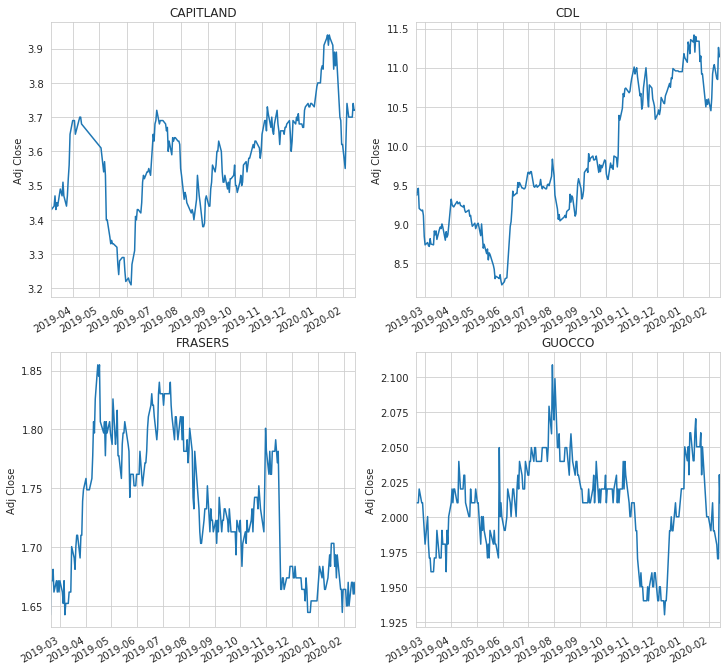

In [7]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}")

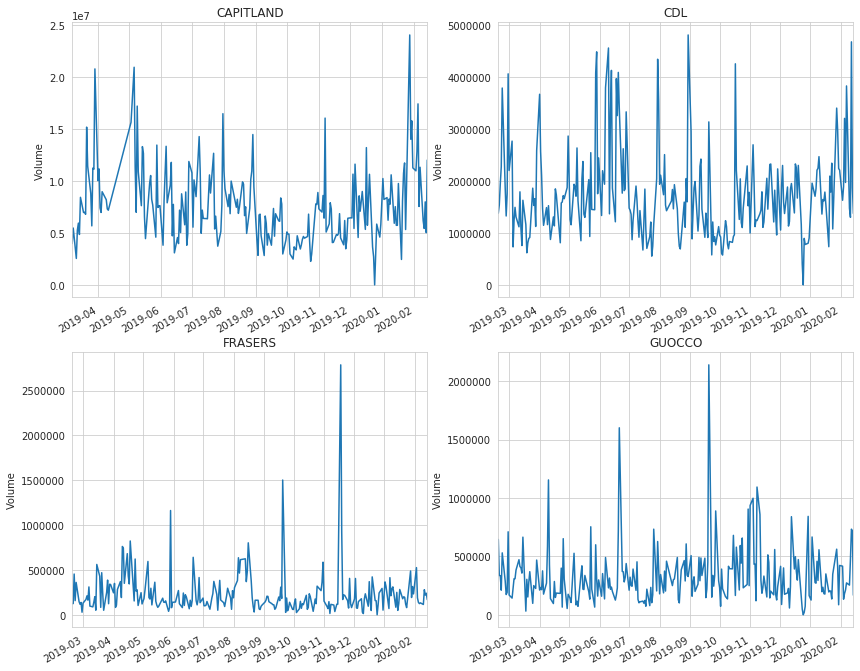

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}")

2. What was the moving average og the various stocks?¶



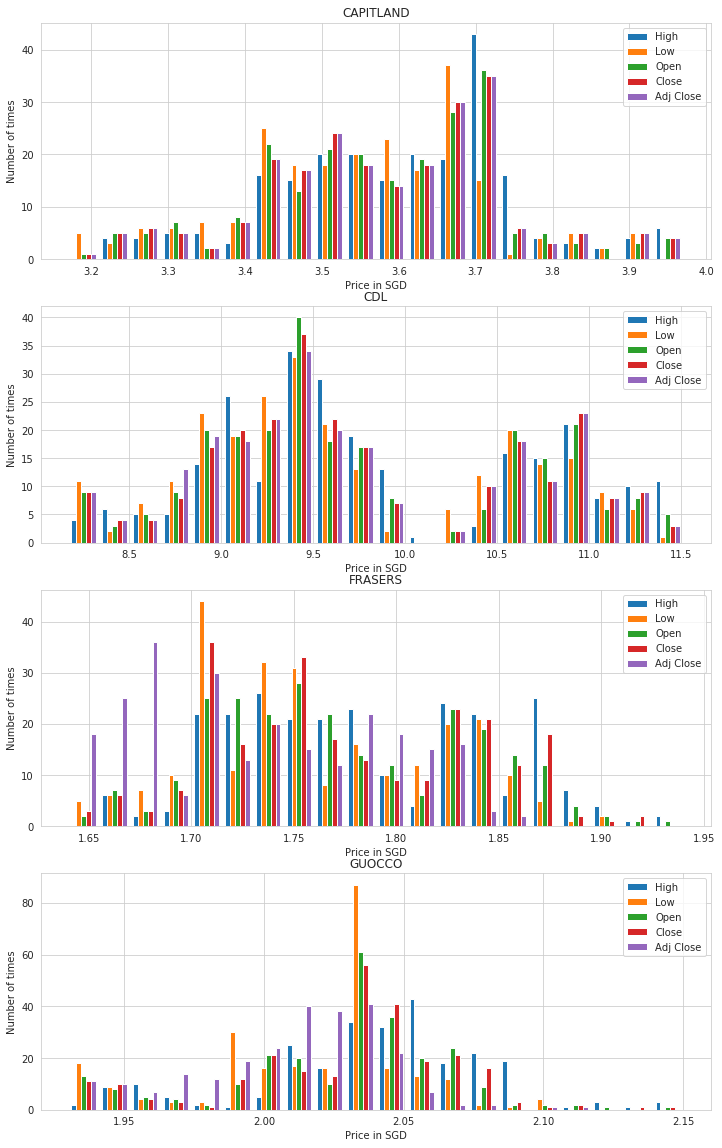

In [9]:
df_vol = df.drop('Volume',axis = 1)
g = df_vol.groupby('company_name')
num_groups = g.ngroups

fig, axes = plt.subplots(num_groups,figsize=(12,20))
for i, (k, group) in enumerate(g):
    ax = axes[i]
    ax.set_title(k)
    ax.set_ylabel('Number of times')
    ax.set_xlabel('Price in SGD')
    group = group[[c for c in group.columns if c != 'company_name']]
    num_columns = len(group.columns)
    #colours = plt.Spectral([float(x) / num_columns for x in range(num_columns)])
    ax.hist(group.values, 20, 
             histtype='bar',
            label=list(group.columns), 
            linewidth=1, edgecolor='white')
    ax.legend()

plt.show()

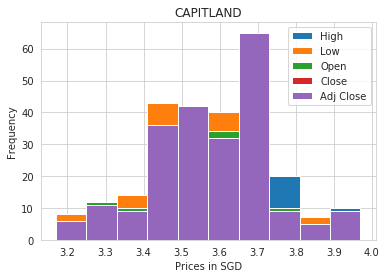

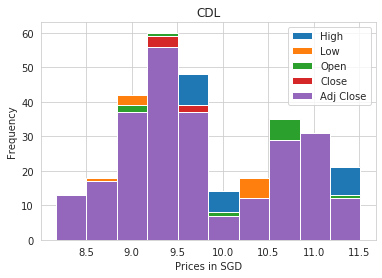

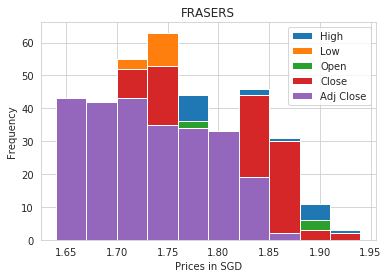

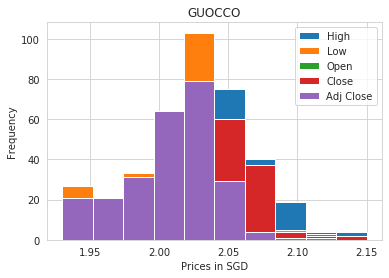

In [15]:
axes = g.plot(kind='hist')
for i, (groupname, group) in enumerate(g):
    axes[i].set_title(groupname)
    axes[i].set_xlabel('Prices in SGD')
    

In [0]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [0]:
num_groups

3

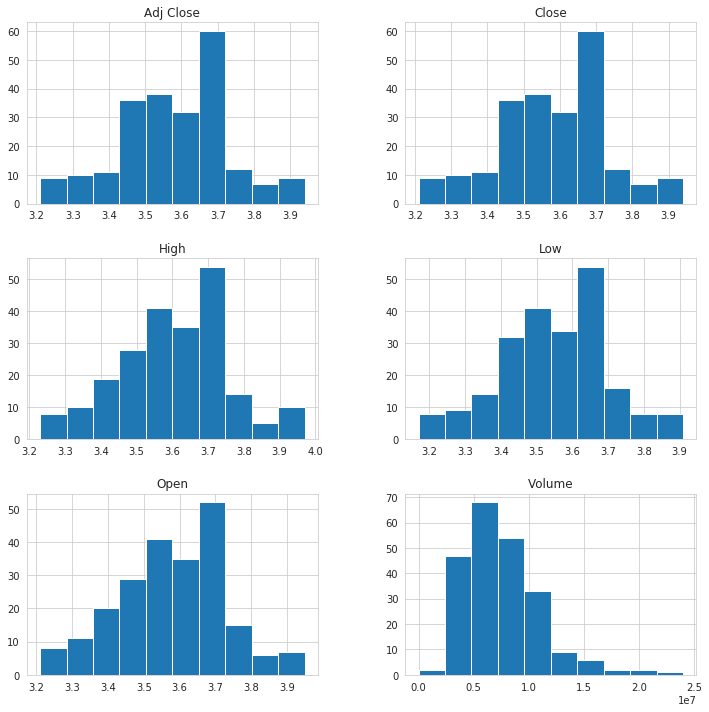

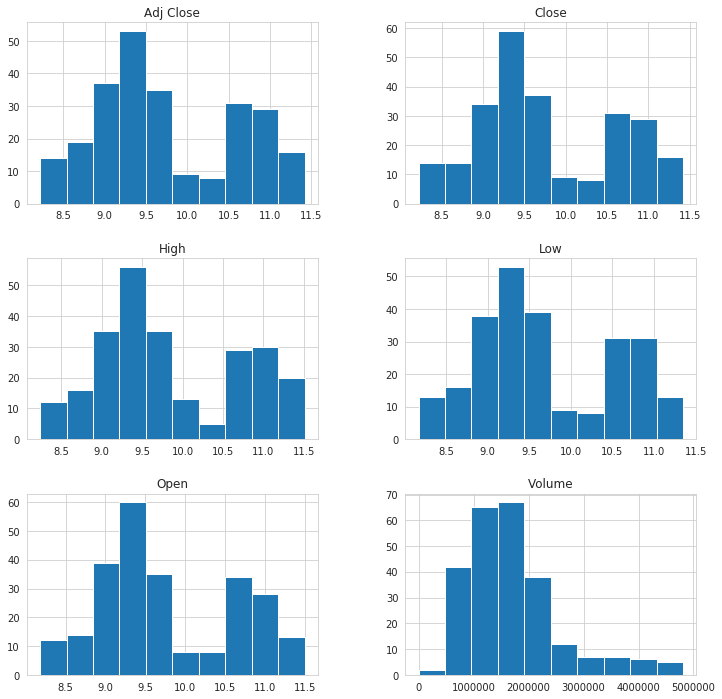

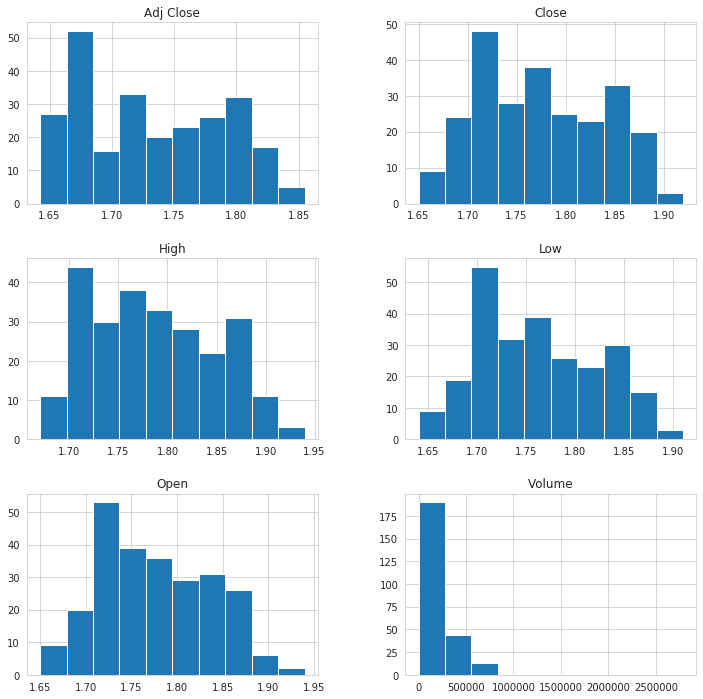

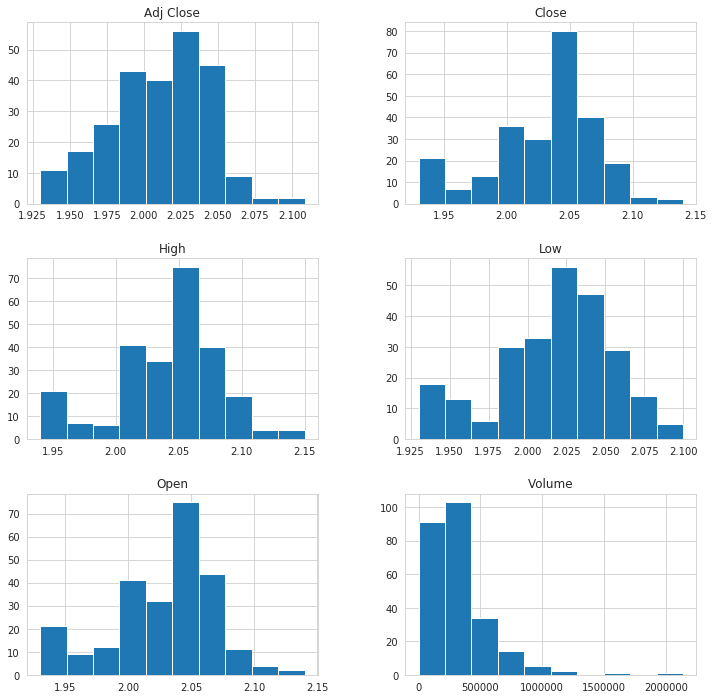

In [0]:
plt.label=('Number of times')
df.groupby("company_name").hist(figsize=(12, 12));
plt.show()


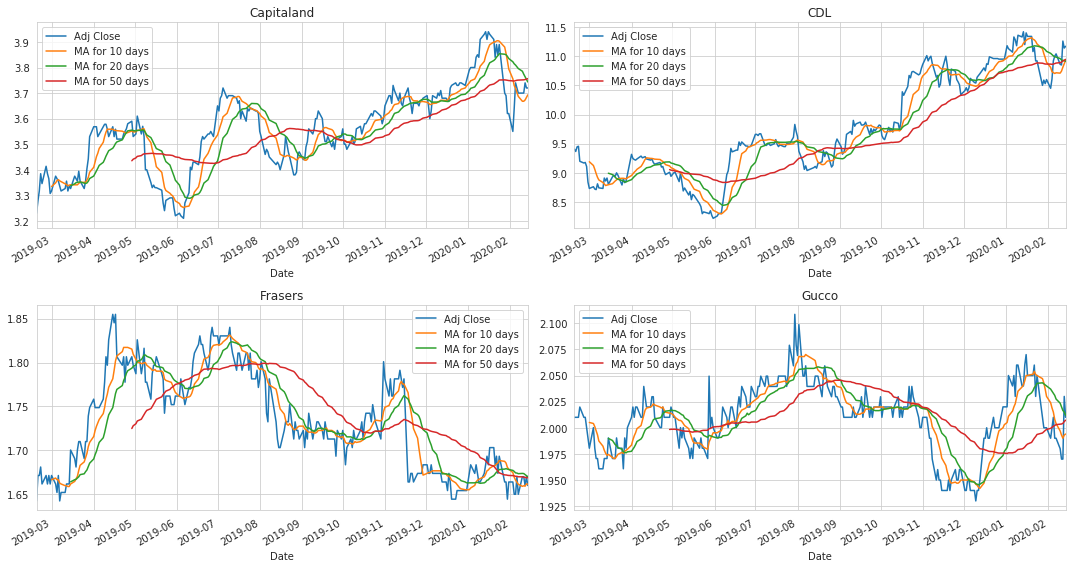

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

C31SI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Capitaland')

C09SI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('CDL')

TQ5SI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Frasers')

W05SI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Gucco')

fig.tight_layout()

3. What was the daily return of the stock on average?¶


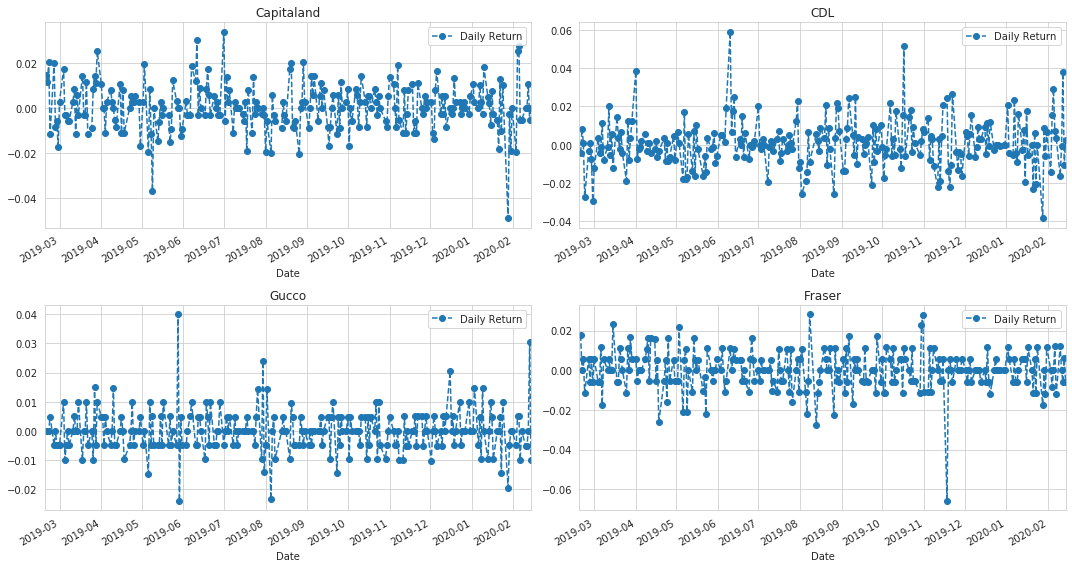

In [0]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

C31SI['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Capitaland')

C09SI['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('CDL')

W05SI['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Gucco')

TQ5SI['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Fraser')

fig.tight_layout()

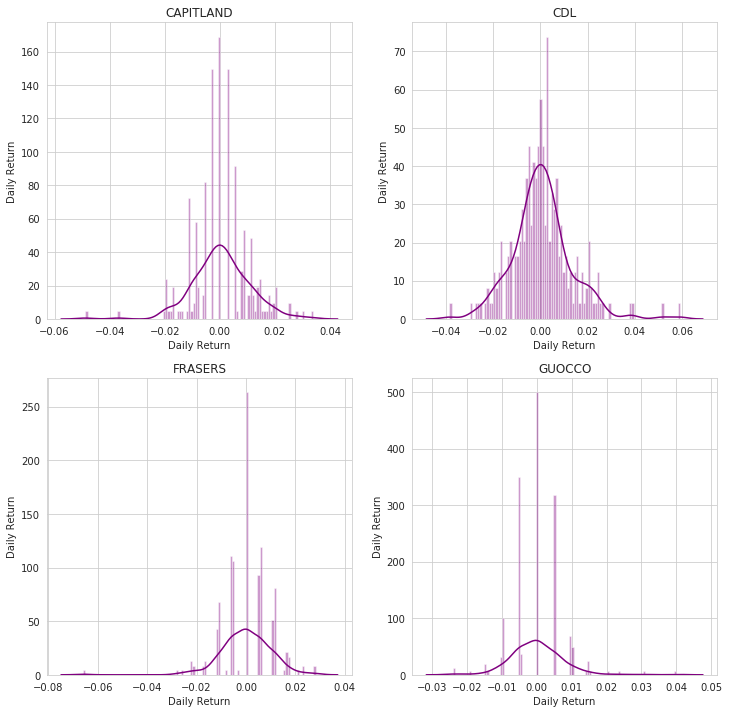

In [0]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

4. What was the correlation between different stocks' closing prices?

In [0]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,C31.SI,C09.SI,TQ5.SI,W05.SI
Date,,,,
2019-02-18,3.229890,9.406480,1.642413,2.010000
2019-02-19,3.278242,9.366832,1.671397,2.010000
2019-02-20,3.316923,9.446128,1.671397,2.010000
2019-02-21,3.384615,9.456039,1.681058,2.010000
2019-02-22,3.345934,9.198328,1.661736,2.019853


In [0]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,C31.SI,C09.SI,TQ5.SI,W05.SI
Date,,,,
2019-02-18,NaN,NaN,NaN,NaN
2019-02-19,0.014970,-0.004215,0.017647,0.000000
2019-02-20,0.011799,0.008466,0.000000,0.000000
2019-02-21,0.020408,0.001049,0.005780,0.000000
2019-02-22,-0.011429,-0.027254,-0.011494,0.004902


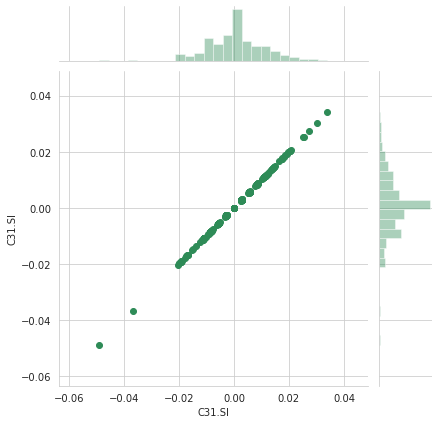

In [0]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('C31.SI', 'C31.SI', tech_rets, kind='scatter', color='seagreen')

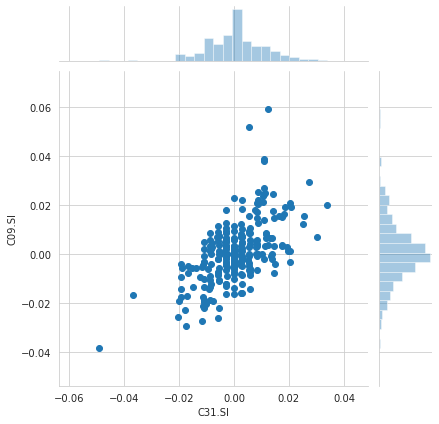

In [0]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('C31.SI', 'C09.SI', tech_rets, kind='scatter')

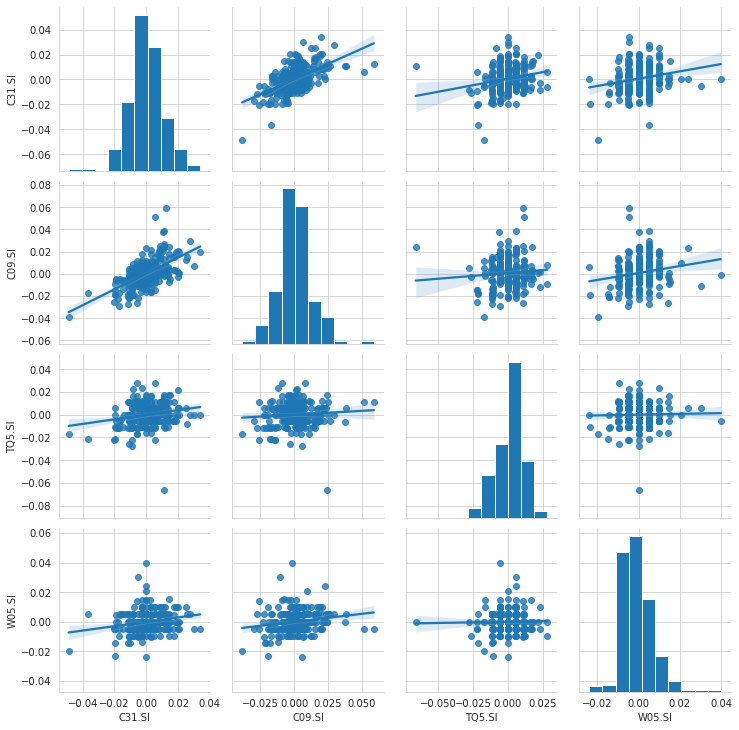

In [0]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

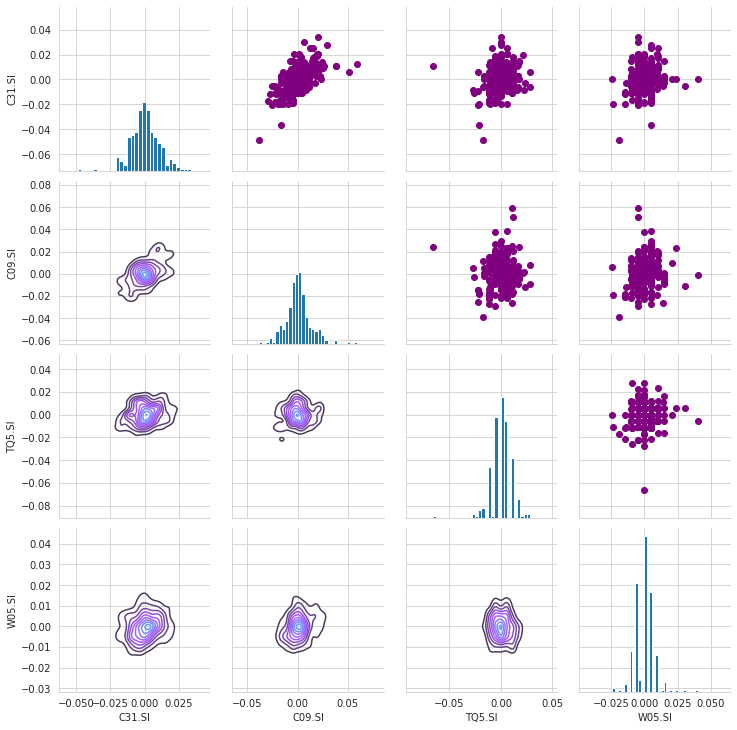

In [0]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

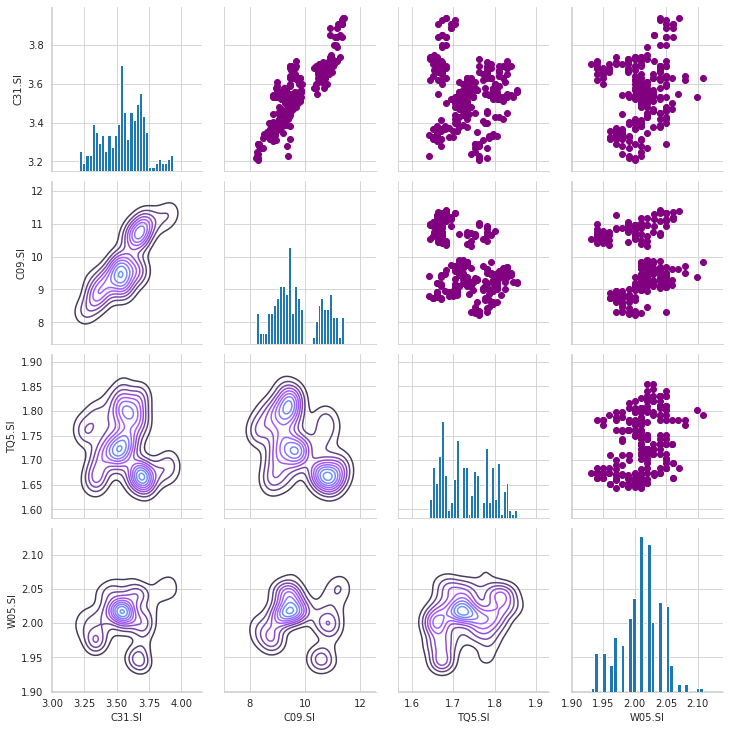

In [0]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

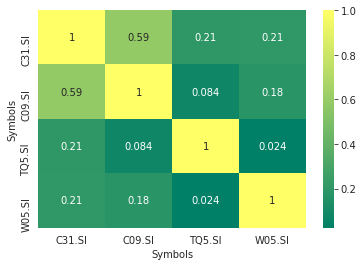

In [0]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

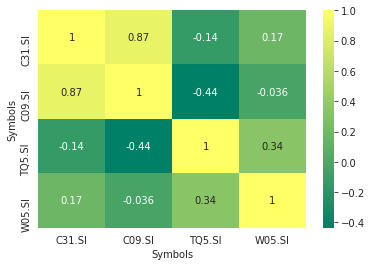

In [0]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

5. How much value do we put at risk by investing in a particular stock?

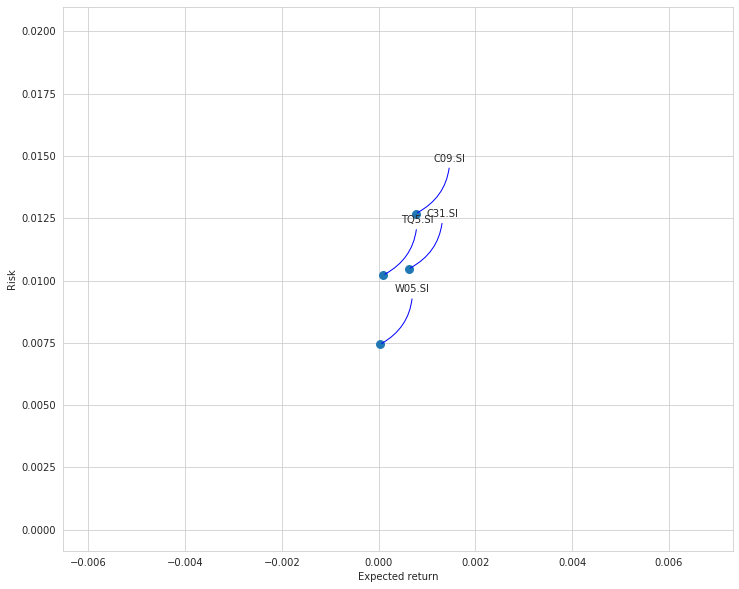

In [0]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [0]:
group.values

array([[-0.21210129,  0.1685664 , -0.1609738 , -0.37786403, -0.71394461],
       [ 0.47984573,  1.58964832,  0.09237536,  1.32700686, -0.23352299],
       [ 0.36107208,  0.8337555 ,  1.7676664 ,  0.12076088,  1.14217725],
       [ 1.26750281, -1.12539167,  2.1175092 ,  0.46304505, -0.90878545],
       [-1.15080448, -0.16206874,  0.01696142,  1.60290603, -1.87068587],
       [ 0.00333111, -0.95513154,  0.77255166,  1.14507796,  1.03589473],
       [ 0.06455218,  0.38635677,  0.40779078,  1.01861762, -0.84928346],
       [ 1.17929157,  0.10818443, -0.7605515 ,  1.95182925,  0.20429511],
       [-1.40226855,  0.22761563, -1.36599768, -0.5915341 ,  0.34317407]])